## BigMart Sales Prediction
The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.

### Import basic libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

### Load the dataset

In [2]:
data=pd.read_csv("bigmart.csv")
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Column Information
- Item_Identifier: Unique product ID
- Item_Weight: Weight of product
- Item_Fat_Content: Whether the product is low fat or not
- Item_Visibility: The % of total display area of all products in a store allocated to the particular product
- Item_Type: The category to which the product belongs
- Item_MRP: Maximum Retail Price (list price) of the product
- Outlet_Identifier: Unique store ID
- Outlet_Establishment_Year: The year in which store was established
- Outlet_Size: The size of the store in terms of ground area covered
- Outlet_Location_Type: The type of city in which the store is located
- Outlet_Type: Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales: Sales of the product in the particulat store. This is the outcome variable to be predicted.

### Basic Checks

In [3]:
# First five rows
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# Last five rows
data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
# Shape of data
data.shape

(8523, 12)

In [6]:
# Columns in data
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [7]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
# Statistics of data
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# Statistics of data for categorical data
data.describe(include="O")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [8]:
# Check missing values
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item weight and outlet size columns have missing values.

### Exploratory Data Analysis

### Analyze Outlet Size column

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64


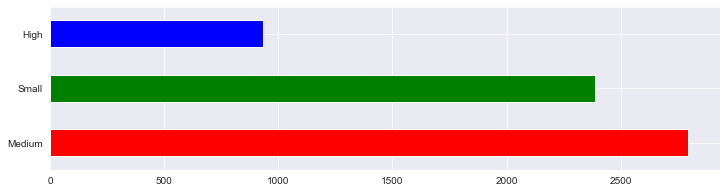

In [9]:
print(data.Outlet_Size.value_counts())
data.Outlet_Size.value_counts().plot(kind='barh', figsize=(12,3), color=['red','green','blue']);

### Analyze Item Fat Content

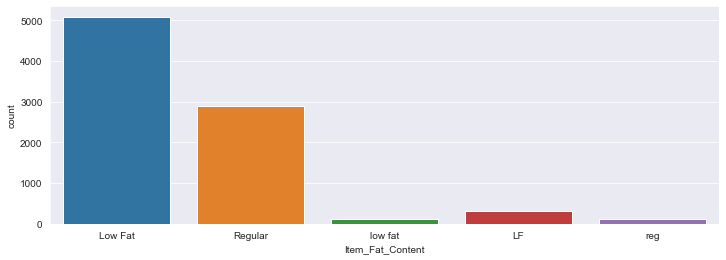

In [10]:
plt.figure(figsize=(12,4))
sns.countplot(x='Item_Fat_Content',data=data);

### Analyzing outlet related columns

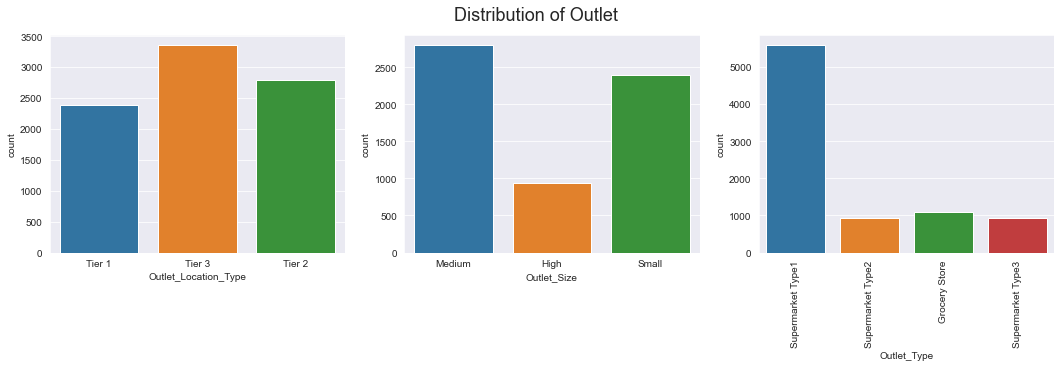

In [11]:
plt.figure(figsize=(18,4))
plt.subplot(131)
sns.countplot(data['Outlet_Location_Type'])

plt.subplot(132)
sns.countplot(data['Outlet_Size'])

plt.subplot(133)
sns.countplot(data['Outlet_Type'])
plt.xticks(rotation=90)
plt.suptitle("Distribution of Outlet", fontsize=18);

### Analyze Item type column

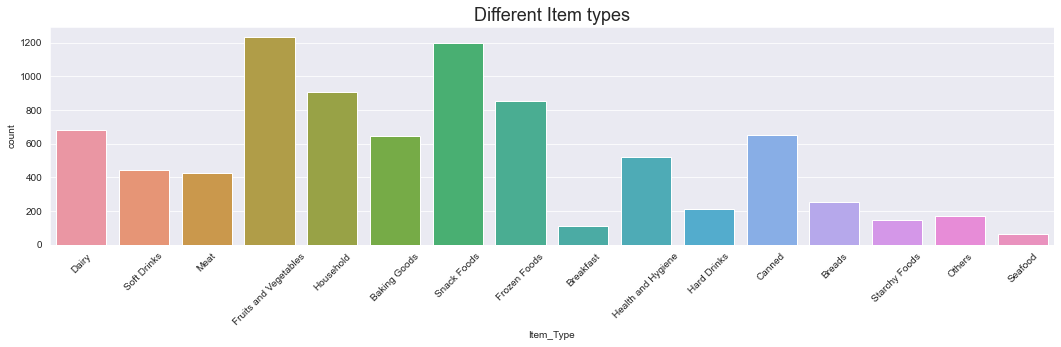

In [12]:
plt.figure(figsize=(18,4))
sns.countplot(data['Item_Type'])
plt.xticks(rotation=45)
plt.title("Different Item types", fontsize=18);

### Bivariate Analysis

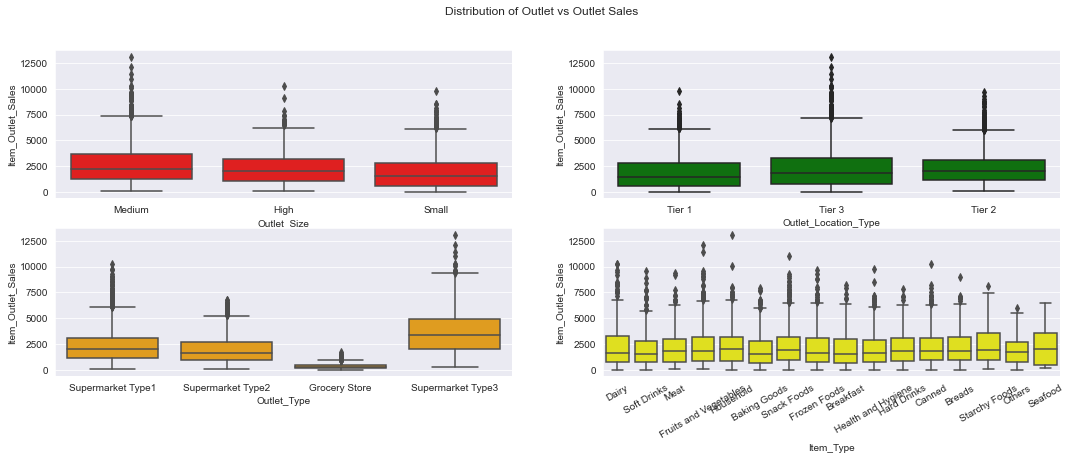

In [13]:
plt.figure(figsize=(18,6))
plt.subplot(221)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data, color='red')

plt.subplot(222)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data, color='green')

plt.subplot(223)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data, color="orange")

plt.subplot(224)
sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, color="yellow")
plt.xticks(rotation=30)

plt.suptitle("Distribution of Outlet vs Outlet Sales");

### Correlation Matrix

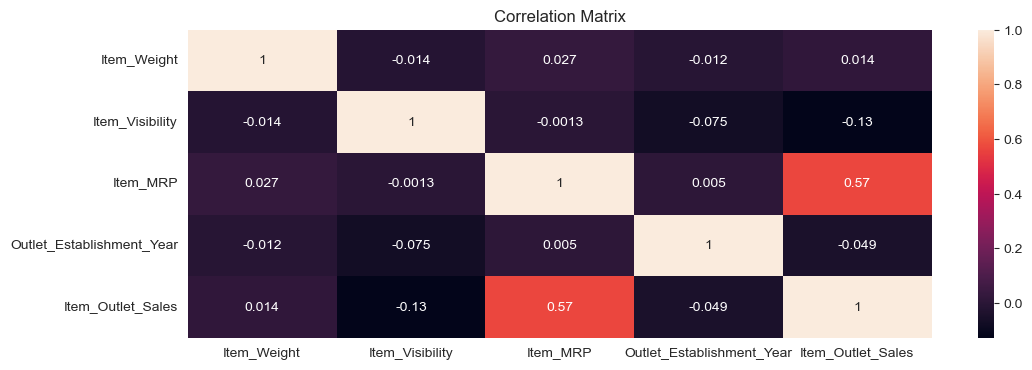

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(data.corr(),annot=True)
plt.title("Correlation Matrix");

### Data Preprocessing

In [15]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

#### Imputing missing values in Item Weight column as per Item Identifier

In [16]:
item_weight_mean=data.pivot_table(values='Item_Weight', index='Item_Identifier')
item_weight_mean.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [17]:
miss_bool=data.Item_Weight.isna()
miss_bool

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [18]:
for i, item in enumerate(data.Item_Weight):
    if miss_bool[i]:
        if item in item_weight_mean:
            data.Item_Weight[i]=item_weight_mean.loc[item]['Item_Weight']
        else:
            data.Item_Weight[i]=np.mean(data.Item_Weight)
            
data['Item_Weight'].isna().sum()

0

#### Impute missing values in Outlet Size

In [19]:
outlet_size_mode=data.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [20]:
miss_bool=data.Outlet_Size.isna()
data.loc[miss_bool, 'Outlet_Size']=data.loc[miss_bool,'Outlet_Type'].apply(lambda x: outlet_size_mode[x])
data.Outlet_Size.isna().sum()

0

In [21]:
data.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### Outlier treatment in Output variable

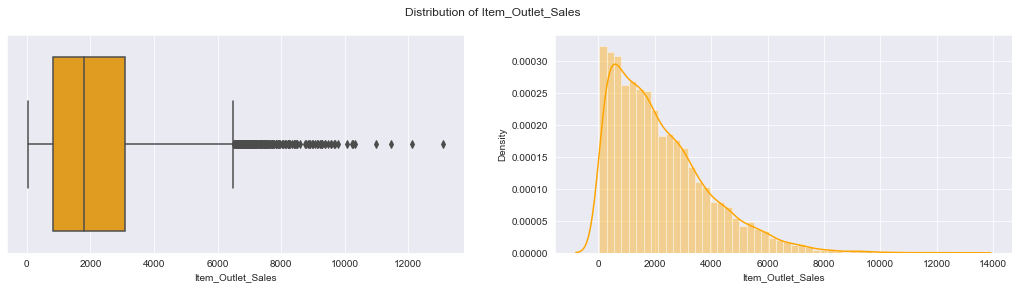

In [22]:
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.boxplot(data['Item_Outlet_Sales'], color='orange')

plt.subplot(122)
sns.distplot(data['Item_Outlet_Sales'], color='orange')
plt.suptitle("Distribution of Item_Outlet_Sales");

#### Remove data points which are lying above 10000.

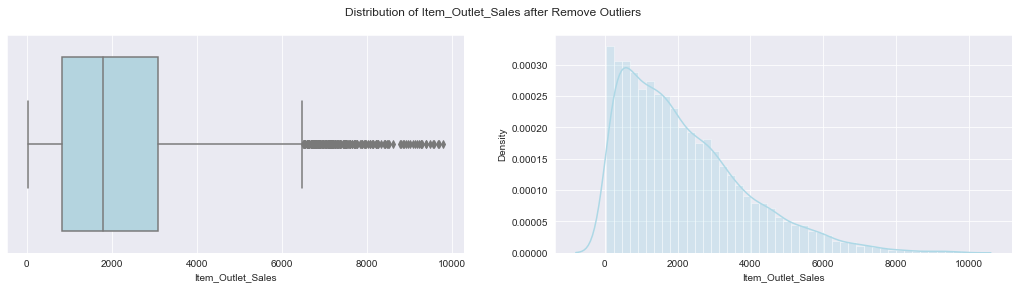

In [23]:
data=data[data['Item_Outlet_Sales']<10000]
plt.figure(figsize=(18,4))
plt.subplot(121)
sns.boxplot(data['Item_Outlet_Sales'], color='lightblue')

plt.subplot(122)
sns.distplot(data['Item_Outlet_Sales'], color='lightblue')
plt.suptitle("Distribution of Item_Outlet_Sales after Remove Outliers");

### Drop Unwanted columns

In [24]:
data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'], axis=1, inplace=True)
data.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

### Splitting data into Dependent & Independent features

In [25]:
X=data.drop("Item_Outlet_Sales",axis=1)
y=data.Item_Outlet_Sales
X.head(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6812, 8) (1703, 8) (6812,) (1703,)


### OneHotEncoder for Categorical columns and Standard Scaler for Numeric Columns

#### Tranform X train

In [32]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
cat_col=['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
ohe_fit=ohe.fit(x_train[cat_col])
x_train_cat_col_dum=ohe_fit.transform(x_train[cat_col]).toarray()
x_train_cat_col_dum

array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [40]:
from sklearn.preprocessing import StandardScaler
std_scaler=StandardScaler()
num_col=['Item_Weight','Item_Visibility','Item_MRP']
std_scaler_fit=std_scaler.fit(x_train[num_col])
x_train_num_col_std=std_scaler_fit.transform(x_train[num_col])
x_train_num_col_std[:5]

array([[-0.00544471, -0.27739187, -0.84820589],
       [-0.80307765, -1.28838146,  1.45356291],
       [ 0.82418947, -0.6558379 ,  0.39854492],
       [ 0.85982306,  0.25562867, -0.61574757],
       [-1.27581657,  0.71797327, -0.49636378]])

In [41]:
x_train_tf=np.hstack([x_train_cat_col_dum, x_train_num_col_std])
x_train_tf[:1]

array([[ 0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
         1.        , -0.00544471, -0.27739187, -0.84820589]])

#### Transform X test

In [43]:
x_test_cat_col_dum=ohe_fit.transform(x_test[cat_col]).toarray()
x_test_num_col_std=std_scaler_fit.transform(x_test[num_col])
x_test_tf=np.hstack([x_test_cat_col_dum, x_test_num_col_std])
x_test_tf[:1]

array([[ 0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  1.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        , -0.00544471, -0.90346535, -0.80371286]])

In [45]:
x_train_tf.shape

(6812, 34)

## ANN Model to predict sales prediction

In [44]:
import keras
from keras.layers import Dense
from keras.models import Sequential

In [46]:
model=Sequential()
model.add(Dense(units=32,kernel_initializer='normal',activation='relu',input_dim=34))
model.add(Dense(units=64,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=128,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=512,kernel_initializer='normal',activation='relu'))
model.add(Dense(units=1,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                1120      
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 512)               66048     
                                                                 
 dense_4 (Dense)             (None, 1)                 513       
                                                                 
Total params: 78,113
Trainable params: 78,113
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compile layer
model.compile(optimizer='adam',loss='mean_absolute_percentage_error',metrics='mean_absolute_percentage_error')
model.fit(x_train_tf,y_train,epochs=100, batch_size=32, validation_data=(x_test_tf,y_test))

Epoch 1/100
213/213 [==============================] - 8s 12ms/step - loss: 43.9888 - mean_absolute_percentage_error: 43.9888 - val_loss: 45.6419 - val_mean_absolute_percentage_error: 45.6419
Epoch 2/100
213/213 [==============================] - 2s 9ms/step - loss: 43.8677 - mean_absolute_percentage_error: 43.8677 - val_loss: 45.5347 - val_mean_absolute_percentage_error: 45.5347
Epoch 3/100
213/213 [==============================] - 2s 9ms/step - loss: 43.8334 - mean_absolute_percentage_error: 43.8334 - val_loss: 45.4953 - val_mean_absolute_percentage_error: 45.4953
Epoch 4/100
213/213 [==============================] - 2s 9ms/step - loss: 43.4461 - mean_absolute_percentage_error: 43.4461 - val_loss: 45.4814 - val_mean_absolute_percentage_error: 45.4814
Epoch 5/100
213/213 [==============================] - 2s 9ms/step - loss: 43.4486 - mean_absolute_percentage_error: 43.4486 - val_loss: 45.6619 - val_mean_absolute_percentage_error: 45.6619
Epoch 6/100
213/213 [=======================

Epoch 44/100
213/213 [==============================] - 2s 8ms/step - loss: 41.6481 - mean_absolute_percentage_error: 41.6481 - val_loss: 46.3429 - val_mean_absolute_percentage_error: 46.3429
Epoch 45/100
213/213 [==============================] - 2s 8ms/step - loss: 41.6659 - mean_absolute_percentage_error: 41.6659 - val_loss: 46.2452 - val_mean_absolute_percentage_error: 46.2452
Epoch 46/100
213/213 [==============================] - 2s 8ms/step - loss: 41.9874 - mean_absolute_percentage_error: 41.9874 - val_loss: 47.2857 - val_mean_absolute_percentage_error: 47.2857
Epoch 47/100
213/213 [==============================] - 2s 8ms/step - loss: 41.6137 - mean_absolute_percentage_error: 41.6137 - val_loss: 46.0628 - val_mean_absolute_percentage_error: 46.0628
Epoch 48/100
213/213 [==============================] - 2s 8ms/step - loss: 41.5471 - mean_absolute_percentage_error: 41.5471 - val_loss: 46.4991 - val_mean_absolute_percentage_error: 46.4991
Epoch 49/100
213/213 [==================

Epoch 87/100
213/213 [==============================] - 2s 9ms/step - loss: 40.9255 - mean_absolute_percentage_error: 40.9255 - val_loss: 46.5418 - val_mean_absolute_percentage_error: 46.5418
Epoch 88/100
213/213 [==============================] - 2s 9ms/step - loss: 40.9425 - mean_absolute_percentage_error: 40.9425 - val_loss: 47.1045 - val_mean_absolute_percentage_error: 47.1045
Epoch 89/100
213/213 [==============================] - 2s 8ms/step - loss: 40.8094 - mean_absolute_percentage_error: 40.8094 - val_loss: 47.1795 - val_mean_absolute_percentage_error: 47.1795
Epoch 90/100
213/213 [==============================] - 2s 9ms/step - loss: 40.8503 - mean_absolute_percentage_error: 40.8503 - val_loss: 46.5589 - val_mean_absolute_percentage_error: 46.5589
Epoch 91/100
213/213 [==============================] - 2s 8ms/step - loss: 40.7760 - mean_absolute_percentage_error: 40.7760 - val_loss: 47.1558 - val_mean_absolute_percentage_error: 47.1558
Epoch 92/100
213/213 [==================

### Evaluating Model

In [56]:
from sklearn.metrics import mean_absolute_percentage_error as mape, mean_squared_error as mse, r2_score
y_pred=model.predict(x_test_tf)
print("RMSE=", np.sqrt(mse(y_test, y_pred)).round(4))
print("Accuacy=", (1 - mape(y_test, y_pred).round(4))*100,"%")
print("R2 Score=", r2_score(y_test, y_pred).round(4))

54/54 [==============================] - 0s 4ms/step
RMSE= 1281.6275
Accuacy= 52.61 %
R2 Score= 0.4341
